In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn import metrics
import os

In [16]:
final_results_df = pd.DataFrame(columns=('accuracy', 'precision', 'recall', 'f1-score'))

In [17]:
#save values to final table
def saveMetricsFinalDf(name, y_test, y_predict):
    final_accuracy = round(classification_report(y_test, y_predict, labels=[1, 0], output_dict=True)['accuracy'],2)
    final_precision = round(classification_report(y_test, y_predict, labels=[1, 0], output_dict=True)['weighted avg']['precision'],2)
    final_recall = round(classification_report(y_test, y_predict, labels=[1, 0], output_dict=True)['weighted avg']['recall'],2)
    final_f1score = round(classification_report(y_test, y_predict, labels=[1, 0], output_dict=True)['weighted avg']['f1-score'],2)
    final_results_df.loc[name] = [final_accuracy, final_precision, final_recall, final_f1score]

# Model Building

In [18]:
features_df1 = pd.read_csv("../data/tables/mdvr_features.csv")
reduced_features_df1 = pd.read_csv("../data/tables/mdvr_features.csv")
reduced_features_df1= reduced_features_df1.drop(['PD'],axis=1)

features_df2 = pd.read_csv("../data/tables/italian_features.csv")
reduced_features_df2 = pd.read_csv("../data/tables/italian_features.csv")
reduced_features_df2 = reduced_features_df2.drop(['PD'],axis=1)

In [19]:
features_df1.head()

,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD
0,174.444551,4.586180,16.715774,0.007510,0.000043,0.003423,0.003601,0.010270,0.063928,0.563053,0.025459,0.040609,0.070514,0.076376,1.0
1,238.074571,44.053187,17.281836,0.011851,0.000046,0.004060,0.003841,0.012180,0.053362,0.552544,0.014723,0.024095,0.049243,0.044168,1.0
2,192.683946,15.802679,14.853809,0.019649,0.000102,0.009636,0.008887,0.028907,0.063512,0.622949,0.024778,0.034261,0.061366,0.074335,1.0
3,125.366132,14.499180,13.016319,0.025650,0.000200,0.012786,0.013299,0.038358,0.094260,0.995428,0.039215,0.045658,0.075847,0.117646,1.0
4,127.553417,10.604740,13.324051,0.020632,0.000162,0.008991,0.010406,0.026974,0.100337,0.918193,0.037118,0.055268,0.107048,0.111354,1.0


In [20]:
features_df2.head()

,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD
0,129.307948,2.064876,23.959287,0.004173,0.000032,0.002187,0.002334,0.006560,0.024436,0.224043,0.011687,0.014726,0.022840,0.035061,1.0
1,122.038081,5.155957,27.957755,0.004510,0.000037,0.002313,0.002498,0.006938,0.014446,0.175230,0.005156,0.006642,0.014389,0.015468,1.0
2,138.828247,2.136906,33.309475,0.002323,0.000017,0.001113,0.001179,0.003339,0.007289,0.068204,0.002894,0.004096,0.006777,0.008682,1.0
3,213.347835,3.371491,26.434427,0.003564,0.000016,0.002018,0.001938,0.006054,0.012845,0.112993,0.005653,0.007224,0.010797,0.016959,1.0
4,146.076736,16.504125,30.583621,0.003027,0.000021,0.001518,0.001504,0.004555,0.011083,0.122816,0.005337,0.005597,0.009463,0.016012,1.0


In [21]:

reduced_features_df1.head()

,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer
0,174.444551,4.586180,16.715774,0.007510,0.000043,0.003423,0.003601,0.010270,0.063928,0.563053,0.025459,0.040609,0.070514,0.076376
1,238.074571,44.053187,17.281836,0.011851,0.000046,0.004060,0.003841,0.012180,0.053362,0.552544,0.014723,0.024095,0.049243,0.044168
2,192.683946,15.802679,14.853809,0.019649,0.000102,0.009636,0.008887,0.028907,0.063512,0.622949,0.024778,0.034261,0.061366,0.074335
3,125.366132,14.499180,13.016319,0.025650,0.000200,0.012786,0.013299,0.038358,0.094260,0.995428,0.039215,0.045658,0.075847,0.117646
4,127.553417,10.604740,13.324051,0.020632,0.000162,0.008991,0.010406,0.026974,0.100337,0.918193,0.037118,0.055268,0.107048,0.111354


In [22]:
reduced_features_df2.head()

,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer
0,129.307948,2.064876,23.959287,0.004173,0.000032,0.002187,0.002334,0.006560,0.024436,0.224043,0.011687,0.014726,0.022840,0.035061
1,122.038081,5.155957,27.957755,0.004510,0.000037,0.002313,0.002498,0.006938,0.014446,0.175230,0.005156,0.006642,0.014389,0.015468
2,138.828247,2.136906,33.309475,0.002323,0.000017,0.001113,0.001179,0.003339,0.007289,0.068204,0.002894,0.004096,0.006777,0.008682
3,213.347835,3.371491,26.434427,0.003564,0.000016,0.002018,0.001938,0.006054,0.012845,0.112993,0.005653,0.007224,0.010797,0.016959
4,146.076736,16.504125,30.583621,0.003027,0.000021,0.001518,0.001504,0.004555,0.011083,0.122816,0.005337,0.005597,0.009463,0.016012


In [23]:
features_df = pd.concat([features_df1, features_df2], ignore_index=True, sort=False)
reduced_features_df = pd.concat([reduced_features_df1, reduced_features_df2], ignore_index=True, sort=False)

In [24]:
features_df

,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD
0,174.444551,4.586180,16.715774,0.007510,0.000043,0.003423,0.003601,0.010270,0.063928,0.563053,0.025459,0.040609,0.070514,0.076376,1.0
1,238.074571,44.053187,17.281836,0.011851,0.000046,0.004060,0.003841,0.012180,0.053362,0.552544,0.014723,0.024095,0.049243,0.044168,1.0
2,192.683946,15.802679,14.853809,0.019649,0.000102,0.009636,0.008887,0.028907,0.063512,0.622949,0.024778,0.034261,0.061366,0.074335,1.0
3,125.366132,14.499180,13.016319,0.025650,0.000200,0.012786,0.013299,0.038358,0.094260,0.995428,0.039215,0.045658,0.075847,0.117646,1.0
4,127.553417,10.604740,13.324051,0.020632,0.000162,0.008991,0.010406,0.026974,0.100337,0.918193,0.037118,0.055268,0.107048,0.111354,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,120.238273,15.841945,31.049953,0.002637,0.000022,0.001333,0.001443,0.004000,0.016649,0.184037,0.006842,0.009043,0.016924,0.020526,0.0
1280,125.702970,3.419908,14.176360,0.006556,0.000052,0.003642,0.003866,0.010925,0.061772,0.595184,0.029273,0.036155,0.059658,0.087818,0.0
1281,132.869272,19.792501,12.890455,0.007489,0.000055,0.003827,0.004149,0.011480,0.061772,0.595184,0.029273,0.036155,0.059658,0.087818,0.0
1282,213.347835,5.931401,14.642913,0.007489,0.000055,0.003827,0.004233,0.011480,0.061772,0.595184,0.029273,0.036155,0.059658,0.087818,0.0


In [25]:
reduced_features_df

,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer
0,174.444551,4.586180,16.715774,0.007510,0.000043,0.003423,0.003601,0.010270,0.063928,0.563053,0.025459,0.040609,0.070514,0.076376
1,238.074571,44.053187,17.281836,0.011851,0.000046,0.004060,0.003841,0.012180,0.053362,0.552544,0.014723,0.024095,0.049243,0.044168
2,192.683946,15.802679,14.853809,0.019649,0.000102,0.009636,0.008887,0.028907,0.063512,0.622949,0.024778,0.034261,0.061366,0.074335
3,125.366132,14.499180,13.016319,0.025650,0.000200,0.012786,0.013299,0.038358,0.094260,0.995428,0.039215,0.045658,0.075847,0.117646
4,127.553417,10.604740,13.324051,0.020632,0.000162,0.008991,0.010406,0.026974,0.100337,0.918193,0.037118,0.055268,0.107048,0.111354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,120.238273,15.841945,31.049953,0.002637,0.000022,0.001333,0.001443,0.004000,0.016649,0.184037,0.006842,0.009043,0.016924,0.020526
1280,125.702970,3.419908,14.176360,0.006556,0.000052,0.003642,0.003866,0.010925,0.061772,0.595184,0.029273,0.036155,0.059658,0.087818
1281,132.869272,19.792501,12.890455,0.007489,0.000055,0.003827,0.004149,0.011480,0.061772,0.595184,0.029273,0.036155,0.059658,0.087818
1282,213.347835,5.931401,14.642913,0.007489,0.000055,0.003827,0.004233,0.011480,0.061772,0.595184,0.029273,0.036155,0.059658,0.087818


In [26]:
# lets build our classification model
# independent variables
X = reduced_features_df
# X=pd.DataFrame(X_stand1)
# the dependent variable
y = features_df['PD']

In [27]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [28]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(reduced_features_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(reduced_features_df.index)) * 100))

69.94% data is in training set
30.06% data is in test set


In [29]:
y_train_yPD=y_train[y_train==1].count()
y_train_nPD=y_train[y_train==0].count()
y_test_yPD=y_test[y_test==1].count()
y_test_nPD=y_test[y_test==0].count()

print("In the original dataset people who had parkinson Dieases    : {0} ({1:0.2f}%)".format(len(reduced_features_df.loc[features_df['PD'] == 1]), (len(reduced_features_df.loc[features_df['PD'] == 1])/len(reduced_features_df.index)) * 100))
print("In the original dataset people who didnot have Parkinson Disease   : {0} ({1:0.2f}%)".format(len(reduced_features_df.loc[features_df['PD'] == 0]), (len(reduced_features_df.loc[features_df['PD'] == 0])/len(reduced_features_df.index)) * 100))
print("")
print("In the training dataset people who who had parkinson Dieases    : {0} ({1:0.2f}%)".format(y_train_yPD, (y_train_yPD/len(y_train))*100))
print("In the training dataset people who didnot have Parkinson Disease    : {0} ({1:0.2f}%)".format(y_train_nPD, (y_train_nPD/len(y_train))*100))
print("")
print("In the test dataset people who who had parkinson Dieases    : {0} ({1:0.2f}%)".format(y_test_yPD, (y_test_yPD/len(y_test))*100))
print("In the test dataset people who didnot have Parkinson Disease    : {0} ({1:0.2f}%)".format(y_test_nPD, (y_test_nPD/len(y_test))*100))

In the original dataset people who had parkinson Dieases    : 608 (47.35%)
In the original dataset people who didnot have Parkinson Disease   : 676 (52.65%)

In the training dataset people who who had parkinson Dieases    : 413 (45.99%)
In the training dataset people who didnot have Parkinson Disease    : 485 (54.01%)

In the test dataset people who who had parkinson Dieases    : 195 (50.52%)
In the test dataset people who didnot have Parkinson Disease    : 191 (49.48%)


Scales impact

Gradient descent based algorithms like Linear Regression, Logistics Regression
Distance based algorithms like KNN, K-means and SVM
Scales dont impact:

Tree based algorithms like Decision trees

In [30]:
# lets create a copy of the train and test data for scaling


X_Train_stand = X_train.copy()
X_Test_stand = X_test.copy()
# we will use standard scaler for scaling the data.
scale = StandardScaler().fit(X_Train_stand)
X_train= scale.transform(X_Train_stand)
X_test= scale.transform(X_Test_stand)

In [31]:
if (pd.DataFrame(X_train).isnull().sum().any()==0):
    print('There are no null values in the training datset')
else:
    print('There are null values in the training datset')

if (pd.DataFrame(X_test).isnull().sum().any()==0):
    print('There are no null values in the test datset')
else:
    print('There are null values in the test datset')

There are no null values in the training datset
There are no null values in the test datset


# Logistic Regression

In [32]:
# Fit the model on train data
model = LogisticRegression(solver="liblinear")
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [33]:
# predict on the test data
y_predict_lr = model.predict(X_test)
y_predict_lr

array([1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0.

In [34]:
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
coef_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,intercept
0,-0.238071,-0.328,0.956843,-0.085994,1.23045,-0.279643,0.783888,-0.279643,-0.020069,0.427185,-0.221263,0.249383,-0.734583,-0.221263,-0.199947


In [35]:
model_score_lr = model.score(X_test, y_test)
print("Model Accuracy of Logistic Regression is: {0:.4f}".format(model_score_lr))
print()

Model Accuracy of Logistic Regression is: 0.7124



Confusion Matrix - Logistic Regression


<Axes: >

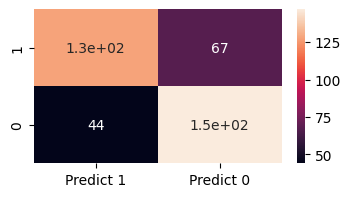

In [36]:
print("Confusion Matrix - Logistic Regression")
cm=metrics.confusion_matrix(y_test, y_predict_lr, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True)

In [37]:
print("Classification Report - Logistic Regression")
print(metrics.classification_report(y_test, y_predict_lr, labels=[1, 0]))

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           1       0.74      0.66      0.70       195
           0       0.69      0.77      0.73       191

    accuracy                           0.71       386
   macro avg       0.72      0.71      0.71       386
weighted avg       0.72      0.71      0.71       386



In [38]:
saveMetricsFinalDf('Logistic Regression', y_test, y_predict_lr)

# Logistic Regression with Hyperparameter tuning

Best Score: 0.7204952143154391
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}
72.02072538860104
              precision    recall  f1-score   support

         0.0       0.69      0.78      0.73       191
         1.0       0.75      0.66      0.70       195

    accuracy                           0.72       386
   macro avg       0.72      0.72      0.72       386
weighted avg       0.72      0.72      0.72       386

0.720821586790173
[1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.

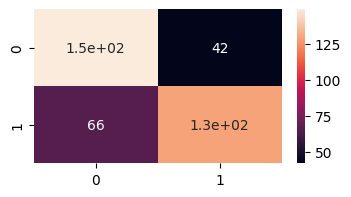

In [39]:
########Hyperparameter tuning for SVM####################
#List Hyperparameters that we want to tune.
#n_components = list(range(1,X.shape[1]+1,1))
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

#Convert to dictionary
hyperparameters = dict(solver=solvers,penalty=penalty,C=c_values)
#Create new LR object
model_lr2 = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(model_lr2, hyperparameters, cv=cv)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_lr_2 = best_model.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_lr_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100

plt.figure(figsize = (4,2))
sns.heatmap(conf_matrix_knn_2, annot=True)

print(accuracy_knn_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_lr_2))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_lr_2))

print(y_pred_lr_2)
print(y_test)

saveMetricsFinalDf('Logistic Regression (HPT)', y_test, y_pred_lr_2)

# KNN

In [40]:
# Call Nearest Neighbour algorithm and fit the model on train data
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(X_train, np.ravel(y_train,order='C'))

KNeighborsClassifier(weights='distance')

In [41]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. 
#The majority class will be assigned to the test data point

y_predict_knn = NNH.predict(X_test)
model_score_knn = NNH.score(X_test, y_test)

print("Model Accuracy of KNN is: {0:.4f}".format(model_score_knn))
print()

Model Accuracy of KNN is: 0.7824



Confusion Matrix - KNN


<Axes: >

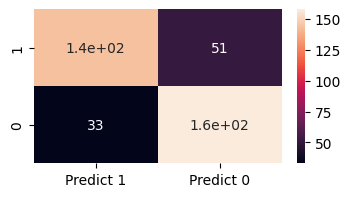

In [42]:
print("Confusion Matrix - KNN")
cm=metrics.confusion_matrix(y_test, y_predict_knn, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True)

In [43]:
print("Classification Report - KNN")
print(metrics.classification_report(y_test, y_predict_knn, labels=[1, 0]))

saveMetricsFinalDf('KNN', y_test, y_predict_knn)

Classification Report - KNN
              precision    recall  f1-score   support

           1       0.81      0.74      0.77       195
           0       0.76      0.83      0.79       191

    accuracy                           0.78       386
   macro avg       0.78      0.78      0.78       386
weighted avg       0.79      0.78      0.78       386



# KNN with hyperparameter tuning

Best leaf_size: 1
Best p: 1
Best n_neighbors: 6
Best Score: 0.7850062421972535
Best Hyperparameters: {'leaf_size': 1, 'n_neighbors': 6, 'p': 1}
{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'p': [1, 2]}
74.09326424870466
              precision    recall  f1-score   support

         0.0       0.70      0.85      0.76       191
         1.0       0.81      0.64      0.71       195

    accuracy                           0.74       386
   macro avg       0.75      0.74      0.74       386
weighted avg       0.75      0.74      0.74       386

0.7420324875822258
[1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 

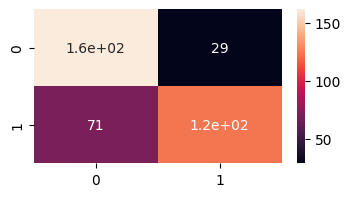

In [44]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,20)) #neighbours must be < number of samples (22)
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_knn_2 = best_model.predict(X_test)

conf_matrix_knn_2 = confusion_matrix(y_test, y_pred_knn_2)

accuracy_knn_2 = ((conf_matrix_knn_2[0,0] + conf_matrix_knn_2[1,1])/(conf_matrix_knn_2[0,0] +conf_matrix_knn_2[0,1]+conf_matrix_knn_2[1,0]+conf_matrix_knn_2[1,1]))*100


print(accuracy_knn_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_knn_2))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_knn_2))

print(y_pred_knn_2)
print(y_test)

plt.figure(figsize = (4,2))
sns.heatmap(conf_matrix_knn_2, annot=True)

saveMetricsFinalDf('KNN (HPT)', y_test, y_pred_knn_2)

# Naive Bayes

### No important parameters to tune

In [45]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [46]:
y_predict_nb = NB_model.predict(X_test)
model_score_nb=metrics.accuracy_score(y_test, y_predict_nb)

print("Model Accuracy of Naive Bayes is: {0:.4f}".format(model_score_nb))
print()

Model Accuracy of Naive Bayes is: 0.6658



Confusion Matrix - Naive Bayes


<Axes: >

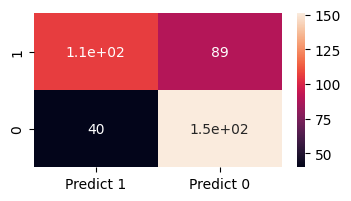

In [47]:
print("Confusion Matrix - Naive Bayes")
cm=metrics.confusion_matrix(y_test, y_predict_nb, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True)

In [48]:
print("Classification Report - Naive Bayes")
print(metrics.classification_report(y_test, y_predict_nb, labels=[1, 0]))

saveMetricsFinalDf('NB', y_test, y_predict_nb)

Classification Report - Naive Bayes
              precision    recall  f1-score   support

           1       0.73      0.54      0.62       195
           0       0.63      0.79      0.70       191

    accuracy                           0.67       386
   macro avg       0.68      0.67      0.66       386
weighted avg       0.68      0.67      0.66       386



# SVM

In [49]:
clf = svm.SVC(gamma=0.025, C=3) 

In [50]:
clf.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

In [51]:
y_predict_svm = clf.predict(X_test)

In [52]:
model_score_svm=metrics.accuracy_score(y_test, y_predict_svm)

print("Model Accuracy of SVM is: {0:.4f}".format(model_score_svm))
print()

Model Accuracy of SVM is: 0.7591



Confusion Matrix - SVM


<Axes: >

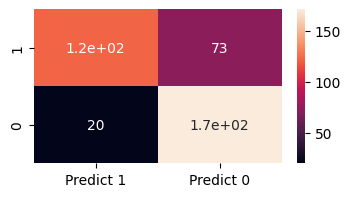

In [53]:
print("Confusion Matrix - SVM")
cm=metrics.confusion_matrix(y_test, y_predict_svm, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True)

In [54]:
print("Classification Report - SVM")
print(metrics.classification_report(y_test, y_predict_svm, labels=[1, 0]))

saveMetricsFinalDf('SVM', y_test, y_predict_svm)

Classification Report - SVM
              precision    recall  f1-score   support

           1       0.86      0.63      0.72       195
           0       0.70      0.90      0.79       191

    accuracy                           0.76       386
   macro avg       0.78      0.76      0.76       386
weighted avg       0.78      0.76      0.75       386



# SVM with hyperparameter tuning

Best Score: 0.8151272501551832
Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
79.53367875647669
              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       191
         1.0       0.83      0.75      0.79       195

    accuracy                           0.80       386
   macro avg       0.80      0.80      0.80       386
weighted avg       0.80      0.80      0.79       386

0.7958249429453618
[1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 0

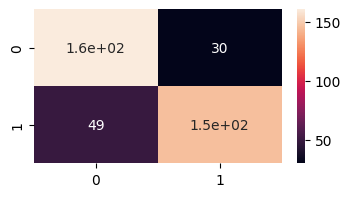

In [55]:
########Hyperparameter tuning for SVM####################
#List Hyperparameters that we want to tune.
#n_components = list(range(1,X.shape[1]+1,1))
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
kernel = ['rbf']

#Convert to dictionary
hyperparameters = dict(C=C, gamma=gamma, kernel=kernel)
#Create new SVM object
svm2 = svm.SVC()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Use GridSearch
clf = GridSearchCV(svm2, hyperparameters, refit=True)

#clf = RandomizedSearchCV(knn_2, hyperparameters, n_iter=500, cv=8, scoring="recall")
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Score: %s' % best_model.best_score_)
print('Best Hyperparameters: %s' % best_model.best_params_)
print(hyperparameters)
y_pred_svm_2 = best_model.predict(X_test)

conf_matrix_svm_2 = confusion_matrix(y_test, y_pred_svm_2)

accuracy_svm_2 = ((conf_matrix_svm_2[0,0] + conf_matrix_svm_2[1,1])/(conf_matrix_svm_2[0,0] +conf_matrix_svm_2[0,1]+conf_matrix_svm_2[1,0]+conf_matrix_svm_2[1,1]))*100


print(accuracy_svm_2)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_svm_2))
#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred_svm_2))

print(y_pred_svm_2)
print(y_test)

plt.figure(figsize = (4,2))
sns.heatmap(conf_matrix_svm_2, annot=True)

saveMetricsFinalDf('SVM (HPT)', y_test, y_pred_svm_2)

# Random Forest

In [56]:
model_rf = RandomForestClassifier(n_estimators = 50,random_state=1,max_features=3) 
model_rf = model_rf.fit(X_train, y_train)

In [57]:
y_predict_rf = model_rf.predict(X_test)
print(model_rf.score(X_test, y_test))

0.7927461139896373


Confusion Matrix -Random Forest


<Axes: >

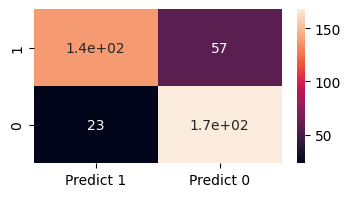

In [58]:
print("Confusion Matrix -Random Forest")
cm=metrics.confusion_matrix(y_test, y_predict_rf, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True)

In [59]:
print("Classification Report - Random Forest")
print(metrics.classification_report(y_test, y_predict_rf, labels=[1, 0]))

saveMetricsFinalDf('Random Forest', y_test, y_predict_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

           1       0.86      0.71      0.78       195
           0       0.75      0.88      0.81       191

    accuracy                           0.79       386
   macro avg       0.80      0.79      0.79       386
weighted avg       0.80      0.79      0.79       386



# Random Forest with Hyperparameter Tuning

In [60]:
#TODO

# Bagging

In [61]:
bgcl = BaggingClassifier(n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [62]:
y_predict_bag = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))

0.7927461139896373


Confusion Matrix -Bagging Classifier


<Axes: >

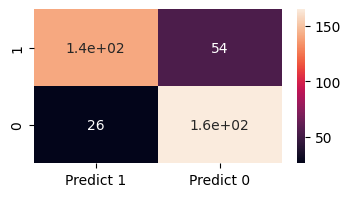

In [63]:
print("Confusion Matrix -Bagging Classifier")
cm=metrics.confusion_matrix(y_test, y_predict_bag, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True)



In [64]:
print("Classification Report - Bagging Classifier")
print(metrics.classification_report(y_test, y_predict_bag, labels=[1, 0]))

saveMetricsFinalDf('Bagging', y_test, y_predict_bag)

Classification Report - Bagging Classifier
              precision    recall  f1-score   support

           1       0.84      0.72      0.78       195
           0       0.75      0.86      0.80       191

    accuracy                           0.79       386
   macro avg       0.80      0.79      0.79       386
weighted avg       0.80      0.79      0.79       386



# Bagging with Hyperparameter Tuning

Best Hyperparameters: {'n_estimators': 40}
Best Model Accuracy: 0.7772020725388601
Confusion Matrix - Bagging Classifier
Classification Report - Bagging Classifier
              precision    recall  f1-score   support

           1       0.83      0.70      0.76       195
           0       0.74      0.86      0.79       191

    accuracy                           0.78       386
   macro avg       0.78      0.78      0.78       386
weighted avg       0.79      0.78      0.78       386



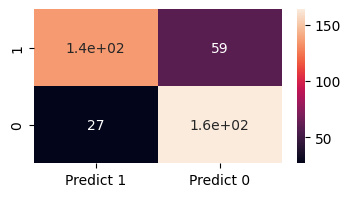

In [65]:
#TESTE


# Define the Bagging Classifier with hyperparameters to be tuned
bgcl = BaggingClassifier(random_state=1)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],  # Adjust the number of estimators
    # You can add more hyperparameters to tune here
}

# Define the scoring method, e.g., accuracy
scoring = make_scorer(accuracy_score)

# Create the Grid Search object
grid_search = GridSearchCV(bgcl, param_grid, scoring=scoring, cv=5)

# Fit the Grid Search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best Bagging Classifier model
best_bgcl = grid_search.best_estimator_

# Fit the best model on the training data
best_bgcl.fit(X_train, y_train)

# Make predictions on the test set
y_predict_bag_2 = best_bgcl.predict(X_test)

# Print the accuracy of the best model on the test set
accuracy = best_bgcl.score(X_test, y_test)
print("Best Model Accuracy:", accuracy)

# Compute and print the confusion matrix
print("Confusion Matrix - Bagging Classifier")
cm = confusion_matrix(y_test, y_predict_bag_2, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=["1", "0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(4, 2))
sns.heatmap(df_cm, annot=True)

# Print the classification report
print("Classification Report - Bagging Classifier")
print(classification_report(y_test, y_predict_bag_2, labels=[1, 0]))

saveMetricsFinalDf('Bagging (HPT)', y_test, y_predict_bag_2)


# AdaBoost

In [66]:
AdaBC = AdaBoostClassifier(n_estimators=50, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
AdaBC = AdaBC.fit(X_train, y_train)

In [67]:
y_predict_ada = AdaBC.predict(X_test)
print(AdaBC.score(X_test , y_test))

0.7435233160621761


Confusion Matrix -Ada Boost


<Axes: >

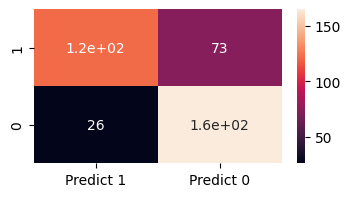

In [68]:
print("Confusion Matrix -Ada Boost")
cm=metrics.confusion_matrix(y_test, y_predict_ada, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (4,2))
sns.heatmap(df_cm, annot=True)

In [69]:
print("Classification Report - Ada Boost")
print(metrics.classification_report(y_test, y_predict_ada, labels=[1, 0]))

saveMetricsFinalDf('AdaBoost', y_test, y_predict_ada)

Classification Report - Ada Boost
              precision    recall  f1-score   support

           1       0.82      0.63      0.71       195
           0       0.69      0.86      0.77       191

    accuracy                           0.74       386
   macro avg       0.76      0.74      0.74       386
weighted avg       0.76      0.74      0.74       386



# AdaBoost with Hyperparameter Tuning

Best Hyperparameters: {'n_estimators': 20}
Best Model Accuracy: 0.7357512953367875
Confusion Matrix - Ada Boost
Classification Report - Ada Boost
              precision    recall  f1-score   support

           1       0.81      0.62      0.70       195
           0       0.69      0.85      0.76       191

    accuracy                           0.74       386
   macro avg       0.75      0.74      0.73       386
weighted avg       0.75      0.74      0.73       386



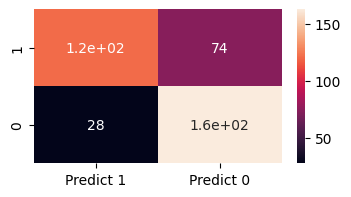

In [70]:
#TESTE


# Define the AdaBoost Classifier with hyperparameters to be tuned
AdaBC = AdaBoostClassifier(random_state=1)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],  # Adjust the number of estimators
    # You can add more hyperparameters to tune here
}

# Define the scoring method, e.g., accuracy
scoring = make_scorer(accuracy_score)

# Create the Grid Search object
grid_search = GridSearchCV(AdaBC, param_grid, scoring=scoring, cv=5)

# Fit the Grid Search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best AdaBoost Classifier model
best_AdaBC = grid_search.best_estimator_

# Fit the best model on the training data
best_AdaBC.fit(X_train, y_train)

# Make predictions on the test set
y_predict_ada_2 = best_AdaBC.predict(X_test)

# Print the accuracy of the best model on the test set
accuracy = best_AdaBC.score(X_test, y_test)
print("Best Model Accuracy:", accuracy)

# Compute and print the confusion matrix
print("Confusion Matrix - Ada Boost")
cm = confusion_matrix(y_test, y_predict_ada_2, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=["1", "0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(4, 2))
sns.heatmap(df_cm, annot=True)

# Print the classification report
print("Classification Report - Ada Boost")
print(classification_report(y_test, y_predict_ada_2, labels=[1, 0]))

saveMetricsFinalDf('AdaBoost (HPT)', y_test, y_predict_ada_2)


# XG Boost

In [71]:
model = XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=4)
model = model.fit(X_train, y_train)
y_predict_XGB = model.predict(X_test)
print('The accuracy of the XGB Classifier is: [%.8f]' % accuracy_score(y_test, y_predict_XGB))

/Users/tomas/Documents/Tese/Predictive-models-Parkinson/src/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


The accuracy of the XGB Classifier is: [0.77461140]


Confusion Matrix - XGB Classifier


<Axes: >

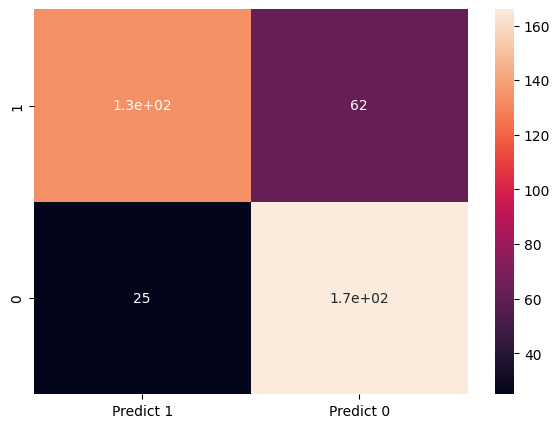

In [72]:
print("Confusion Matrix - XGB Classifier")
cm=metrics.confusion_matrix(y_test, y_predict_XGB, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [73]:
print("Classification Report - XGB Classifier")
print(metrics.classification_report(y_test, y_predict_XGB, labels=[1, 0]))

saveMetricsFinalDf('XGBoost', y_test, y_predict_XGB)

Classification Report - XGB Classifier
              precision    recall  f1-score   support

           1       0.84      0.68      0.75       195
           0       0.73      0.87      0.79       191

    accuracy                           0.77       386
   macro avg       0.78      0.78      0.77       386
weighted avg       0.79      0.77      0.77       386



# XGBoost with Hyperparameter tuning

/Users/tomas/Documents/Tese/Predictive-models-Parkinson/src/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/src/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/src/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/tomas/Documents/Tese/Predictive-models-Parkinson/src/venv/lib/python3.11/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. C

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
The accuracy of the XGB Classifier is: [0.77979275]
Confusion Matrix - XGB Classifier
Classification Report - XGB Classifier
              precision    recall  f1-score   support

           1       0.86      0.68      0.76       195
           0       0.73      0.88      0.80       191

    accuracy                           0.78       386
   macro avg       0.79      0.78      0.78       386
weighted avg       0.79      0.78      0.78       386



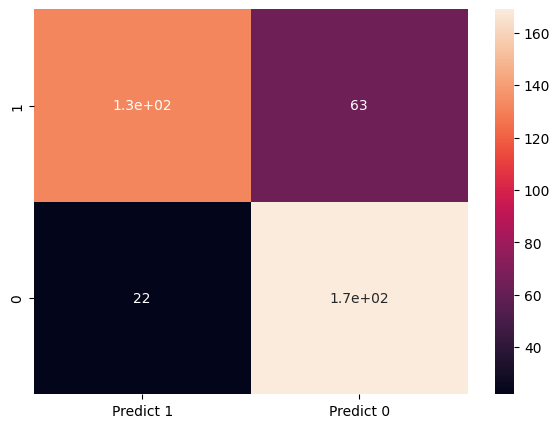

In [74]:

# Define the XGBClassifier with hyperparameters to be tuned
model = XGBClassifier(random_state=0)

# Define the hyperparameters grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Adjust the learning rate
    'n_estimators': [50, 100, 200],  # Adjust the number of estimators
    'max_depth': [3, 4, 5]  # Adjust the maximum depth of trees
    # You can add more hyperparameters to tune here
}

# Define the scoring method, e.g., accuracy
scoring = make_scorer(accuracy_score)

# Create the Grid Search object
grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=5)

# Fit the Grid Search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best XGBClassifier model
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)


# Make predictions on the test set
y_predict_XGB_2 = best_model.predict(X_test)

# Print the accuracy of the best model on the test set
accuracy = accuracy_score(y_test, y_predict_XGB_2)
print('The accuracy of the XGB Classifier is: [%.8f]' % accuracy)

# Compute and print the confusion matrix
print("Confusion Matrix - XGB Classifier")
cm = confusion_matrix(y_test, y_predict_XGB_2, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=["1", "0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True)

# Print the classification report
print("Classification Report - XGB Classifier")
print(classification_report(y_test, y_predict_XGB_2, labels=[1, 0]))


saveMetricsFinalDf('XGBoost (HPT)', y_test, y_predict_XGB_2)



# Final Results

In [75]:
(final_results_df)

,accuracy,precision,recall,f1-score
Logistic Regression,0.71,0.72,0.71,0.71
Logistic Regression (HPT),0.72,0.72,0.72,0.72
KNN,0.78,0.79,0.78,0.78
KNN (HPT),0.74,0.75,0.74,0.74
NB,0.67,0.68,0.67,0.66
SVM,0.76,0.78,0.76,0.75
SVM (HPT),0.80,0.80,0.80,0.79
Random Forest,0.79,0.80,0.79,0.79
Bagging,0.79,0.80,0.79,0.79
Bagging (HPT),0.78,0.79,0.78,0.78
